## MNIST Digits recognition using Keras

In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/n

In [2]:
np.random.seed(0)

In [3]:
# Load train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Check
assert(X_train.shape[0] == y_train.shape[0]), "The number of training images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of test images is not equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "The training dimensions of images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The test dimensions of images are not 28x28"

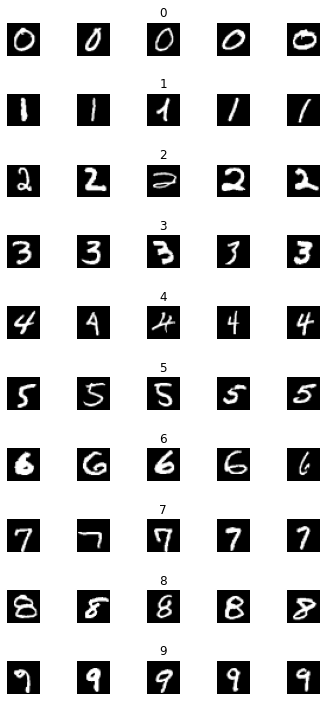

In [6]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off') 
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

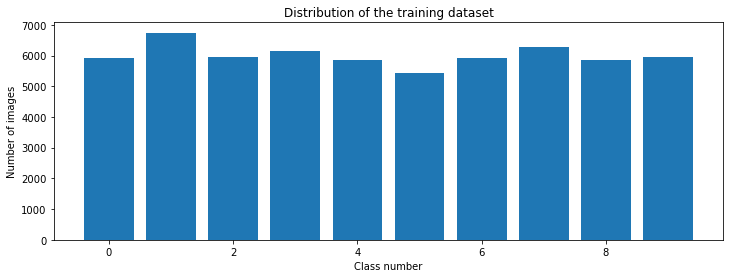

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [8]:
# Create categorical output values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Normalize the pixel values
X_train = X_train/255
X_test = X_test/255

In [10]:
# Flatten the image array
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [11]:
def create_model():
    model = Sequential()
    # Input layer with 784 pixels as input nodes, 10 nodes in 1st hidden layer
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    # Hidden layer with 10 nodes
    model.add(Dense(10, activation='relu'))
    # Output layer with 10 classes
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Train model with training dataset
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.5413 - accuracy: 0.8303 - val_loss: 0.2711 - val_accuracy: 0.9227
Epoch 2/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3024 - accuracy: 0.9113 - val_loss: 0.2387 - val_accuracy: 0.9305
Epoch 3/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.2757 - accuracy: 0.9196 - val_loss: 0.2268 - val_accuracy: 0.9332
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.2631 - accuracy: 0.9219 - val_loss: 0.2153 - val_accuracy: 0.9360
Epoch 5/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.2502 - accuracy: 0.9273 - val_loss: 0.2240 - val_accuracy: 0.9342
Epoch 6/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2482 - accuracy: 0.9280 - val_loss: 0.2198 - val_accuracy: 0.9365
Epoch 7/10
54000/54000 [==============================] - 1s 15us/st

Text(0.5, 0, 'epoch')

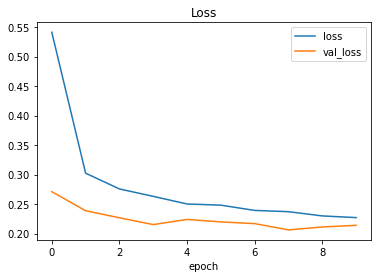

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

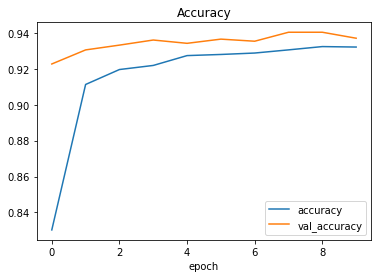

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2638352227419615
Test accuracy: 0.9258000254631042


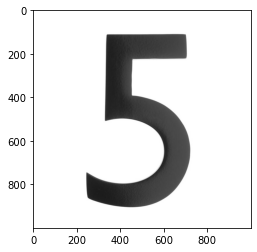

In [17]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

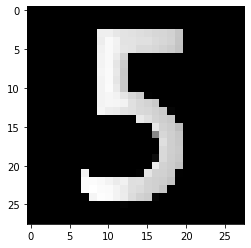

In [21]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scaled = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scaled)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [22]:
image = image/255
image = image.reshape(1, 784)

In [24]:
prediction = model.predict_classes(image)
print('Predicted digit:', str(prediction))

Predicted digit: [5]
